In [1]:
import nltk
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from collections import Counter

# This will help view all the text
pd.set_option('display.max_colwidth', None)

In [2]:
# Load the sample corpus
data = pd.read_csv('purolator_data.csv')
data

,date,id,content,username,like_count,retweet_count
0,2023-06-06 20:03:48+00:00,1666174066829533185,Dear @Dyson the products are cool but the customer service is absolute garbage. If anyone is thinking of buying a #dyson pray nothing goes wrong with your item. It’s a horrible experience &amp; it ends with me personally returning the items to purolator though it’s their mistake,LauraLeigh19,0,0
1,2023-06-06 19:40:18+00:00,1666168155138318336,"@CrtclSprnkls Hi Krista, we'll contact the depot to see if it can be intercepted and made available for pick up for you. Thanks. -Catherine",PurolatorHelp,0,0
2,2023-06-06 19:38:41+00:00,1666167748626399234,"@lieu_days Hi Lu, we're sorry to hear about this incident. The police will open an investigation and will reach out to our Loss and Prevention team, if needed. You can DM me the contact info you have for the claims, we'll make sure someone reaches out to you in timely fashion. -Catherine",PurolatorHelp,0,0
3,2023-06-06 17:05:01+00:00,1666129074887045145,"@FnxAu_streams Hello, our sincere apologies. Can you please send us a DM with the tracking number? Thanks. - Delphine",PurolatorHelp,0,0
4,2023-06-06 17:03:17+00:00,1666128638809452557,Sitting at home with the door open and @PurolatorInc @PurolatorHelp \nSomehow manages to tell me they missed me.\n\nBeen here all day. #purolator\n\nThis happens all the time. Try actually knocking. Or literally anything. https://t.co/WTk3FnzexW,FnxAu_streams,0,0
...,...,...,...,...,...,...
137,2023-05-27 22:16:20+00:00,1662583544311414785,"🌊 Joining hands for cleaner lakefronts! 🚮 \n\nToday, our Purolator Green Team came together to clean up shorelines in #Toronto, #Burlington, #Edmonton, &amp; #Richmond. Together, they worked to restore the beauty of our local shorelines. @OceanWise #ShorelineCleanup https://t.co/7rr2zuVdEr",PurolatorInc,2,1
138,2023-05-27 21:06:39+00:00,1662566005271564288,@M777Monroe @BrainardRichard @JimHawk67327371 Not even close. If you know who built race engines in Nascar for the Purolator Mercury the name was the same as the fuel the twins used.,GMEMDBABY,0,0
139,2023-05-27 19:28:55+00:00,1662541409684017152,My initial purchase is scheduled for delivery on Monday but I will be returning it immediately. The packages are at Purolator and FedEx right now.Can you stop delivery and have them returned? I know that I will be charged $79 return shipping,rrcool53,0,0
140,2023-05-26 23:10:55+00:00,1662234890912366602,Purolator company from Canada didn't send me the gift and they stole it and disappeared. The relationship is very bad. My iPhone 14 pro max and 2 Samsung S10 and other items worth $5000 were stolen.,KyidaSaBC,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           142 non-null    object
 1   id             142 non-null    int64 
 2   content        142 non-null    object
 3   username       142 non-null    object
 4   like_count     142 non-null    int64 
 5   retweet_count  142 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 6.8+ KB


In [4]:
data.describe()

,id,like_count,retweet_count
count,1.420000e+02,142.000000,142.000000
mean,1.664323e+18,0.549296,0.063380
std,1.060283e+15,1.235282,0.296906
min,1.662235e+18,0.000000,0.000000
25%,1.663630e+18,0.000000,0.000000
50%,1.663965e+18,0.000000,0.000000
75%,1.665447e+18,0.750000,0.000000
max,1.666174e+18,7.000000,2.000000


In [5]:
data.nunique()

date             142
id               142
content          141
username          46
like_count         8
retweet_count      3
dtype: int64

In [6]:
pu_df = data

### Handling user handles, links, and emoticons

In [7]:
# Defining regular expressions for user handles and links
user_handle_regex = r'@[\w_]+'
link_regex = r'https?://\S+'

# Defining a dictionary mapping emoticons to their respective feelings
emoticons_mapping = {
    ':)': 'happy',
    ':(': 'sad',
    ':D': 'laugh',
    ':P': 'playful',
    ';)': 'wink',
    ':|': 'neutral',
    ':O': 'surprised',
    ':*': 'kiss',
    ':/': 'confused',
    ':)': 'smile',
    ':\'(': 'cry',
    '$': 'pricing'
}

In [8]:
# Function to replace user handles with '@user'
def replace_user_handles(text):
    return re.sub(user_handle_regex, '@user', text)

# Function to replace links with 'http'
def replace_links(text):
    return re.sub(link_regex, 'http', text)

# Function to replace emoticons with their respective feeling
def replace_emoticons(text):
    for emoticon, feeling in emoticons_mapping.items():
        text = text.replace(emoticon, feeling)
    return text

In [9]:
# Apply the transformations to the 'tweet' column
pu_df['content'] = pu_df['content'].apply(replace_user_handles)
pu_df['content'] = pu_df['content'].apply(replace_links)
pu_df['content'] = pu_df['content'].apply(replace_emoticons)

In [10]:
pu_df.head()

,date,id,content,username,like_count,retweet_count
0,2023-06-06 20:03:48+00:00,1666174066829533185,Dear @user the products are cool but the customer service is absolute garbage. If anyone is thinking of buying a #dyson pray nothing goes wrong with your item. It’s a horrible experience &amp; it ends with me personally returning the items to purolator though it’s their mistake,LauraLeigh19,0,0
1,2023-06-06 19:40:18+00:00,1666168155138318336,"@user Hi Krista, we'll contact the depot to see if it can be intercepted and made available for pick up for you. Thanks. -Catherine",PurolatorHelp,0,0
2,2023-06-06 19:38:41+00:00,1666167748626399234,"@user Hi Lu, we're sorry to hear about this incident. The police will open an investigation and will reach out to our Loss and Prevention team, if needed. You can DM me the contact info you have for the claims, we'll make sure someone reaches out to you in timely fashion. -Catherine",PurolatorHelp,0,0
3,2023-06-06 17:05:01+00:00,1666129074887045145,"@user Hello, our sincere apologies. Can you please send us a DM with the tracking number? Thanks. - Delphine",PurolatorHelp,0,0
4,2023-06-06 17:03:17+00:00,1666128638809452557,Sitting at home with the door open and @user @user \nSomehow manages to tell me they missed me.\n\nBeen here all day. #purolator\n\nThis happens all the time. Try actually knocking. Or literally anything. http,FnxAu_streams,0,0


In [11]:
pu_df.drop(['date','id','username','like_count','retweet_count'],axis=1,inplace=True)

In [12]:
pu_df.head()

,content
0,Dear @user the products are cool but the customer service is absolute garbage. If anyone is thinking of buying a #dyson pray nothing goes wrong with your item. It’s a horrible experience &amp; it ends with me personally returning the items to purolator though it’s their mistake
1,"@user Hi Krista, we'll contact the depot to see if it can be intercepted and made available for pick up for you. Thanks. -Catherine"
2,"@user Hi Lu, we're sorry to hear about this incident. The police will open an investigation and will reach out to our Loss and Prevention team, if needed. You can DM me the contact info you have for the claims, we'll make sure someone reaches out to you in timely fashion. -Catherine"
3,"@user Hello, our sincere apologies. Can you please send us a DM with the tracking number? Thanks. - Delphine"
4,Sitting at home with the door open and @user @user \nSomehow manages to tell me they missed me.\n\nBeen here all day. #purolator\n\nThis happens all the time. Try actually knocking. Or literally anything. http


### Lowercase tweets

In [13]:
pu_df['content'] = pu_df['content'].str.lower()

In [14]:
pu_df.head()

,content
0,dear @user the products are cool but the customer service is absolute garbage. if anyone is thinking of buying a #dyson pray nothing goes wrong with your item. it’s a horrible experience &amp; it ends with me personally returning the items to purolator though it’s their mistake
1,"@user hi krista, we'll contact the depot to see if it can be intercepted and made available for pick up for you. thanks. -catherine"
2,"@user hi lu, we're sorry to hear about this incident. the police will open an investigation and will reach out to our loss and prevention team, if needed. you can dm me the contact info you have for the claims, we'll make sure someone reaches out to you in timely fashion. -catherine"
3,"@user hello, our sincere apologies. can you please send us a dm with the tracking number? thanks. - delphine"
4,sitting at home with the door open and @user @user \nsomehow manages to tell me they missed me.\n\nbeen here all day. #purolator\n\nthis happens all the time. try actually knocking. or literally anything. http


### Tokenize tweets

In [15]:
pu_df['tokenized_content'] = pu_df['content'].apply(word_tokenize)

In [16]:
pu_df.head()

,content,tokenized_content
0,dear @user the products are cool but the customer service is absolute garbage. if anyone is thinking of buying a #dyson pray nothing goes wrong with your item. it’s a horrible experience &amp; it ends with me personally returning the items to purolator though it’s their mistake,"[dear, @, user, the, products, are, cool, but, the, customer, service, is, absolute, garbage, ., if, anyone, is, thinking, of, buying, a, #, dyson, pray, nothing, goes, wrong, with, your, item, ., it, ’, s, a, horrible, experience, &, amp, ;, it, ends, with, me, personally, returning, the, items, to, purolator, though, it, ’, s, their, mistake]"
1,"@user hi krista, we'll contact the depot to see if it can be intercepted and made available for pick up for you. thanks. -catherine","[@, user, hi, krista, ,, we, 'll, contact, the, depot, to, see, if, it, can, be, intercepted, and, made, available, for, pick, up, for, you, ., thanks, ., -catherine]"
2,"@user hi lu, we're sorry to hear about this incident. the police will open an investigation and will reach out to our loss and prevention team, if needed. you can dm me the contact info you have for the claims, we'll make sure someone reaches out to you in timely fashion. -catherine","[@, user, hi, lu, ,, we, 're, sorry, to, hear, about, this, incident, ., the, police, will, open, an, investigation, and, will, reach, out, to, our, loss, and, prevention, team, ,, if, needed, ., you, can, dm, me, the, contact, info, you, have, for, the, claims, ,, we, 'll, make, sure, someone, reaches, out, to, you, in, timely, fashion, ., -catherine]"
3,"@user hello, our sincere apologies. can you please send us a dm with the tracking number? thanks. - delphine","[@, user, hello, ,, our, sincere, apologies, ., can, you, please, send, us, a, dm, with, the, tracking, number, ?, thanks, ., -, delphine]"
4,sitting at home with the door open and @user @user \nsomehow manages to tell me they missed me.\n\nbeen here all day. #purolator\n\nthis happens all the time. try actually knocking. or literally anything. http,"[sitting, at, home, with, the, door, open, and, @, user, @, user, somehow, manages, to, tell, me, they, missed, me, ., been, here, all, day, ., #, purolator, this, happens, all, the, time, ., try, actually, knocking, ., or, literally, anything, ., http]"


### Removing Punctuations

In [17]:
import string

pu_df['tokenized_content'] = pu_df['tokenized_content'].apply(lambda tokens:
                                                              [token for token in tokens if token not in string.punctuation])

In [18]:
pu_df.head()

,content,tokenized_content
0,dear @user the products are cool but the customer service is absolute garbage. if anyone is thinking of buying a #dyson pray nothing goes wrong with your item. it’s a horrible experience &amp; it ends with me personally returning the items to purolator though it’s their mistake,"[dear, user, the, products, are, cool, but, the, customer, service, is, absolute, garbage, if, anyone, is, thinking, of, buying, a, dyson, pray, nothing, goes, wrong, with, your, item, it, ’, s, a, horrible, experience, amp, it, ends, with, me, personally, returning, the, items, to, purolator, though, it, ’, s, their, mistake]"
1,"@user hi krista, we'll contact the depot to see if it can be intercepted and made available for pick up for you. thanks. -catherine","[user, hi, krista, we, 'll, contact, the, depot, to, see, if, it, can, be, intercepted, and, made, available, for, pick, up, for, you, thanks, -catherine]"
2,"@user hi lu, we're sorry to hear about this incident. the police will open an investigation and will reach out to our loss and prevention team, if needed. you can dm me the contact info you have for the claims, we'll make sure someone reaches out to you in timely fashion. -catherine","[user, hi, lu, we, 're, sorry, to, hear, about, this, incident, the, police, will, open, an, investigation, and, will, reach, out, to, our, loss, and, prevention, team, if, needed, you, can, dm, me, the, contact, info, you, have, for, the, claims, we, 'll, make, sure, someone, reaches, out, to, you, in, timely, fashion, -catherine]"
3,"@user hello, our sincere apologies. can you please send us a dm with the tracking number? thanks. - delphine","[user, hello, our, sincere, apologies, can, you, please, send, us, a, dm, with, the, tracking, number, thanks, delphine]"
4,sitting at home with the door open and @user @user \nsomehow manages to tell me they missed me.\n\nbeen here all day. #purolator\n\nthis happens all the time. try actually knocking. or literally anything. http,"[sitting, at, home, with, the, door, open, and, user, user, somehow, manages, to, tell, me, they, missed, me, been, here, all, day, purolator, this, happens, all, the, time, try, actually, knocking, or, literally, anything, http]"


### Removing Stopwords

In [19]:
from nltk.corpus import stopwords

In [20]:
stop_words = set(stopwords.words('english'))

pu_df['tokenized_content'] = pu_df['tokenized_content'].apply(lambda tokens:
                                                              [token for token in tokens if token.lower() not in stop_words])

In [21]:
pu_df.head()

,content,tokenized_content
0,dear @user the products are cool but the customer service is absolute garbage. if anyone is thinking of buying a #dyson pray nothing goes wrong with your item. it’s a horrible experience &amp; it ends with me personally returning the items to purolator though it’s their mistake,"[dear, user, products, cool, customer, service, absolute, garbage, anyone, thinking, buying, dyson, pray, nothing, goes, wrong, item, ’, horrible, experience, amp, ends, personally, returning, items, purolator, though, ’, mistake]"
1,"@user hi krista, we'll contact the depot to see if it can be intercepted and made available for pick up for you. thanks. -catherine","[user, hi, krista, 'll, contact, depot, see, intercepted, made, available, pick, thanks, -catherine]"
2,"@user hi lu, we're sorry to hear about this incident. the police will open an investigation and will reach out to our loss and prevention team, if needed. you can dm me the contact info you have for the claims, we'll make sure someone reaches out to you in timely fashion. -catherine","[user, hi, lu, 're, sorry, hear, incident, police, open, investigation, reach, loss, prevention, team, needed, dm, contact, info, claims, 'll, make, sure, someone, reaches, timely, fashion, -catherine]"
3,"@user hello, our sincere apologies. can you please send us a dm with the tracking number? thanks. - delphine","[user, hello, sincere, apologies, please, send, us, dm, tracking, number, thanks, delphine]"
4,sitting at home with the door open and @user @user \nsomehow manages to tell me they missed me.\n\nbeen here all day. #purolator\n\nthis happens all the time. try actually knocking. or literally anything. http,"[sitting, home, door, open, user, user, somehow, manages, tell, missed, day, purolator, happens, time, try, actually, knocking, literally, anything, http]"


### Lemmatization

In [22]:
from nltk.stem import WordNetLemmatizer

In [23]:
lemmatizer = WordNetLemmatizer()

pu_df['tokenized_content'] = pu_df['tokenized_content'].apply(lambda tokens:
                                                              [lemmatizer.lemmatize(token) for token in tokens])

In [24]:
pu_df.head()

,content,tokenized_content
0,dear @user the products are cool but the customer service is absolute garbage. if anyone is thinking of buying a #dyson pray nothing goes wrong with your item. it’s a horrible experience &amp; it ends with me personally returning the items to purolator though it’s their mistake,"[dear, user, product, cool, customer, service, absolute, garbage, anyone, thinking, buying, dyson, pray, nothing, go, wrong, item, ’, horrible, experience, amp, end, personally, returning, item, purolator, though, ’, mistake]"
1,"@user hi krista, we'll contact the depot to see if it can be intercepted and made available for pick up for you. thanks. -catherine","[user, hi, krista, 'll, contact, depot, see, intercepted, made, available, pick, thanks, -catherine]"
2,"@user hi lu, we're sorry to hear about this incident. the police will open an investigation and will reach out to our loss and prevention team, if needed. you can dm me the contact info you have for the claims, we'll make sure someone reaches out to you in timely fashion. -catherine","[user, hi, lu, 're, sorry, hear, incident, police, open, investigation, reach, loss, prevention, team, needed, dm, contact, info, claim, 'll, make, sure, someone, reach, timely, fashion, -catherine]"
3,"@user hello, our sincere apologies. can you please send us a dm with the tracking number? thanks. - delphine","[user, hello, sincere, apology, please, send, u, dm, tracking, number, thanks, delphine]"
4,sitting at home with the door open and @user @user \nsomehow manages to tell me they missed me.\n\nbeen here all day. #purolator\n\nthis happens all the time. try actually knocking. or literally anything. http,"[sitting, home, door, open, user, user, somehow, manages, tell, missed, day, purolator, happens, time, try, actually, knocking, literally, anything, http]"


### Handling acronyms and slang words

In [25]:
# Dictionary of acronym and slang mappings
acronym_mapping = {
    'omg': 'oh my god',
    'lol': 'laugh out loud',
    'brb': 'be right back',
    'idk': 'i don\'t know',
    'tbh': 'to be honest',
    'fyi': 'for your information',
    'afk': 'away from keyboard',
    'imo': 'in my opinion',
    'jk': 'just kidding',
    'rofl': 'rolling on the floor laughing',
    'dm': 'direct message'
}

In [26]:
pu_df['tokenized_content'] = pu_df['tokenized_content'].apply(lambda tokens:
                                                              [acronym_mapping.get(token, token) for token in tokens])

In [27]:
pu_df.head()

,content,tokenized_content
0,dear @user the products are cool but the customer service is absolute garbage. if anyone is thinking of buying a #dyson pray nothing goes wrong with your item. it’s a horrible experience &amp; it ends with me personally returning the items to purolator though it’s their mistake,"[dear, user, product, cool, customer, service, absolute, garbage, anyone, thinking, buying, dyson, pray, nothing, go, wrong, item, ’, horrible, experience, amp, end, personally, returning, item, purolator, though, ’, mistake]"
1,"@user hi krista, we'll contact the depot to see if it can be intercepted and made available for pick up for you. thanks. -catherine","[user, hi, krista, 'll, contact, depot, see, intercepted, made, available, pick, thanks, -catherine]"
2,"@user hi lu, we're sorry to hear about this incident. the police will open an investigation and will reach out to our loss and prevention team, if needed. you can dm me the contact info you have for the claims, we'll make sure someone reaches out to you in timely fashion. -catherine","[user, hi, lu, 're, sorry, hear, incident, police, open, investigation, reach, loss, prevention, team, needed, direct message, contact, info, claim, 'll, make, sure, someone, reach, timely, fashion, -catherine]"
3,"@user hello, our sincere apologies. can you please send us a dm with the tracking number? thanks. - delphine","[user, hello, sincere, apology, please, send, u, direct message, tracking, number, thanks, delphine]"
4,sitting at home with the door open and @user @user \nsomehow manages to tell me they missed me.\n\nbeen here all day. #purolator\n\nthis happens all the time. try actually knocking. or literally anything. http,"[sitting, home, door, open, user, user, somehow, manages, tell, missed, day, purolator, happens, time, try, actually, knocking, literally, anything, http]"


### Fixing typos

In [28]:
from autocorrect import Speller

In [29]:
spell = Speller(lang='en')

pu_df['tokenized_content'] = pu_df['tokenized_content'].apply(lambda tokens: [spell.autocorrect_word(word) for word in tokens])

In [30]:
pu_df.head()

,content,tokenized_content
0,dear @user the products are cool but the customer service is absolute garbage. if anyone is thinking of buying a #dyson pray nothing goes wrong with your item. it’s a horrible experience &amp; it ends with me personally returning the items to purolator though it’s their mistake,"[dear, user, product, cool, customer, service, absolute, garbage, anyone, thinking, buying, tyson, pray, nothing, go, wrong, item, a, horrible, experience, amp, end, personally, returning, item, purolator, though, a, mistake]"
1,"@user hi krista, we'll contact the depot to see if it can be intercepted and made available for pick up for you. thanks. -catherine","[user, hi, lista, all, contact, depot, see, intercepted, made, available, pick, thanks, catherine]"
2,"@user hi lu, we're sorry to hear about this incident. the police will open an investigation and will reach out to our loss and prevention team, if needed. you can dm me the contact info you have for the claims, we'll make sure someone reaches out to you in timely fashion. -catherine","[user, hi, lu, are, sorry, hear, incident, police, open, investigation, reach, loss, prevention, team, needed, direct message, contact, info, claim, all, make, sure, someone, reach, timely, fashion, catherine]"
3,"@user hello, our sincere apologies. can you please send us a dm with the tracking number? thanks. - delphine","[user, hello, sincere, apology, please, send, u, direct message, tracking, number, thanks, dolphin]"
4,sitting at home with the door open and @user @user \nsomehow manages to tell me they missed me.\n\nbeen here all day. #purolator\n\nthis happens all the time. try actually knocking. or literally anything. http,"[sitting, home, door, open, user, user, somehow, manages, tell, missed, day, purolator, happens, time, try, actually, knocking, literally, anything, http]"


### Removing user and http words

In [31]:
pu_df['tokenized_content'] = pu_df['tokenized_content'].apply(lambda tokens:
                                                        [token for token in tokens if token.lower() not in ['user', 'http']])

In [32]:
pu_df.head()

,content,tokenized_content
0,dear @user the products are cool but the customer service is absolute garbage. if anyone is thinking of buying a #dyson pray nothing goes wrong with your item. it’s a horrible experience &amp; it ends with me personally returning the items to purolator though it’s their mistake,"[dear, product, cool, customer, service, absolute, garbage, anyone, thinking, buying, tyson, pray, nothing, go, wrong, item, a, horrible, experience, amp, end, personally, returning, item, purolator, though, a, mistake]"
1,"@user hi krista, we'll contact the depot to see if it can be intercepted and made available for pick up for you. thanks. -catherine","[hi, lista, all, contact, depot, see, intercepted, made, available, pick, thanks, catherine]"
2,"@user hi lu, we're sorry to hear about this incident. the police will open an investigation and will reach out to our loss and prevention team, if needed. you can dm me the contact info you have for the claims, we'll make sure someone reaches out to you in timely fashion. -catherine","[hi, lu, are, sorry, hear, incident, police, open, investigation, reach, loss, prevention, team, needed, direct message, contact, info, claim, all, make, sure, someone, reach, timely, fashion, catherine]"
3,"@user hello, our sincere apologies. can you please send us a dm with the tracking number? thanks. - delphine","[hello, sincere, apology, please, send, u, direct message, tracking, number, thanks, dolphin]"
4,sitting at home with the door open and @user @user \nsomehow manages to tell me they missed me.\n\nbeen here all day. #purolator\n\nthis happens all the time. try actually knocking. or literally anything. http,"[sitting, home, door, open, somehow, manages, tell, missed, day, purolator, happens, time, try, actually, knocking, literally, anything]"


### Sentimental Analysis

In [33]:
from textblob import TextBlob

In [34]:
pu_df['sentiment'] = pu_df['tokenized_content'].apply(lambda tokens: TextBlob(' '.join(tokens)).sentiment.polarity)

In [35]:
pu_df.head()

,content,tokenized_content,sentiment
0,dear @user the products are cool but the customer service is absolute garbage. if anyone is thinking of buying a #dyson pray nothing goes wrong with your item. it’s a horrible experience &amp; it ends with me personally returning the items to purolator though it’s their mistake,"[dear, product, cool, customer, service, absolute, garbage, anyone, thinking, buying, tyson, pray, nothing, go, wrong, item, a, horrible, experience, amp, end, personally, returning, item, purolator, though, a, mistake]",-0.190000
1,"@user hi krista, we'll contact the depot to see if it can be intercepted and made available for pick up for you. thanks. -catherine","[hi, lista, all, contact, depot, see, intercepted, made, available, pick, thanks, catherine]",0.300000
2,"@user hi lu, we're sorry to hear about this incident. the police will open an investigation and will reach out to our loss and prevention team, if needed. you can dm me the contact info you have for the claims, we'll make sure someone reaches out to you in timely fashion. -catherine","[hi, lu, are, sorry, hear, incident, police, open, investigation, reach, loss, prevention, team, needed, direct message, contact, info, claim, all, make, sure, someone, reach, timely, fashion, catherine]",0.025000
3,"@user hello, our sincere apologies. can you please send us a dm with the tracking number? thanks. - delphine","[hello, sincere, apology, please, send, u, direct message, tracking, number, thanks, dolphin]",0.266667
4,sitting at home with the door open and @user @user \nsomehow manages to tell me they missed me.\n\nbeen here all day. #purolator\n\nthis happens all the time. try actually knocking. or literally anything. http,"[sitting, home, door, open, somehow, manages, tell, missed, day, purolator, happens, time, try, actually, knocking, literally, anything]",0.000000


In [36]:
pu_df.to_csv('Purolator Sentiment.csv', sep=',', index=False, encoding='utf-8')

### Negative tweets

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

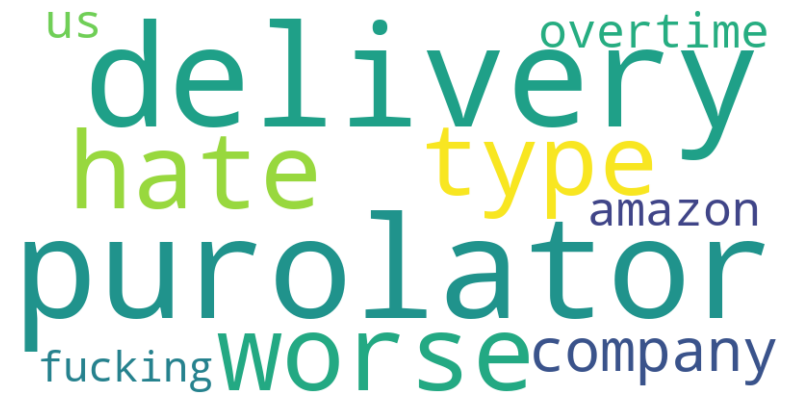

In [38]:
# Filter rows with sentiment scores close to -1
negative_df = pu_df[pu_df['sentiment'] <= -0.3]

# Concatenate all the words into a single string
words = ' '.join(sum(negative_df['tokenized_content'], []))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Neutral tweets

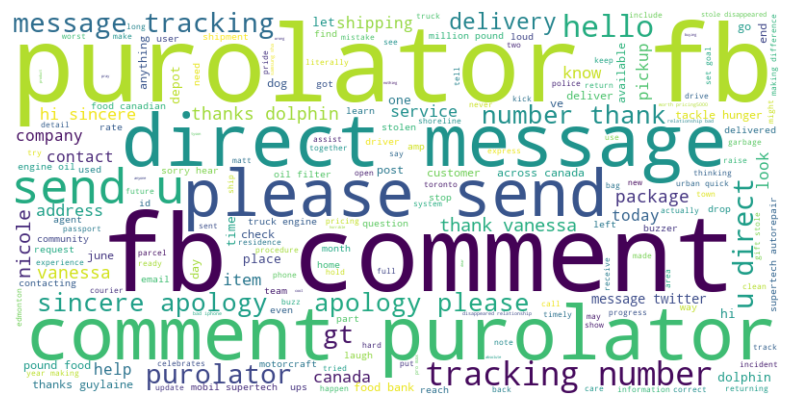

In [39]:
# Filter rows with sentiment scores close to -1
neutral_df = pu_df[(pu_df['sentiment'] > -0.3) & (pu_df['sentiment'] < 0.3)]

# Concatenate all the words into a single string
words = ' '.join(sum(neutral_df['tokenized_content'], []))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Positive tweets

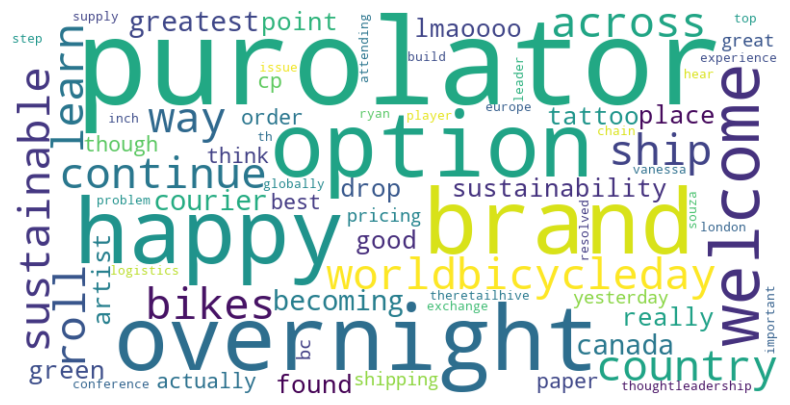

In [40]:
# Filter rows with sentiment scores close to -1

# Concatenate all the words into a single string
words = ' '.join(sum(positive_df['tokenized_content'], []))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
# Define conditions and corresponding values
conditions = [
    pu_df['sentiment']  >= 0.3,
    (pu_df['sentiment'] > -0.3) & (pu_df['sentiment'] < 0.3),
    pu_df['sentiment'] <= -0.3
]

values = ['Postive', 'Neutral', 'Negative']

In [42]:
pu_df['sentiment_type'] = np.select(conditions, values, default='Unknown')

In [43]:
pu_df.head()

,content,tokenized_content,sentiment,sentiment_type
0,dear @user the products are cool but the customer service is absolute garbage. if anyone is thinking of buying a #dyson pray nothing goes wrong with your item. it’s a horrible experience &amp; it ends with me personally returning the items to purolator though it’s their mistake,"[dear, product, cool, customer, service, absolute, garbage, anyone, thinking, buying, tyson, pray, nothing, go, wrong, item, a, horrible, experience, amp, end, personally, returning, item, purolator, though, a, mistake]",-0.190000,Neutral
1,"@user hi krista, we'll contact the depot to see if it can be intercepted and made available for pick up for you. thanks. -catherine","[hi, lista, all, contact, depot, see, intercepted, made, available, pick, thanks, catherine]",0.300000,Postive
2,"@user hi lu, we're sorry to hear about this incident. the police will open an investigation and will reach out to our loss and prevention team, if needed. you can dm me the contact info you have for the claims, we'll make sure someone reaches out to you in timely fashion. -catherine","[hi, lu, are, sorry, hear, incident, police, open, investigation, reach, loss, prevention, team, needed, direct message, contact, info, claim, all, make, sure, someone, reach, timely, fashion, catherine]",0.025000,Neutral
3,"@user hello, our sincere apologies. can you please send us a dm with the tracking number? thanks. - delphine","[hello, sincere, apology, please, send, u, direct message, tracking, number, thanks, dolphin]",0.266667,Neutral
4,sitting at home with the door open and @user @user \nsomehow manages to tell me they missed me.\n\nbeen here all day. #purolator\n\nthis happens all the time. try actually knocking. or literally anything. http,"[sitting, home, door, open, somehow, manages, tell, missed, day, purolator, happens, time, try, actually, knocking, literally, anything]",0.000000,Neutral


In [44]:
pu_df.to_csv('Purolator Sentiment.csv', sep=',', index=False, encoding='utf-8')

In [45]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [46]:
#Count_values for sentiment
count_values_in_column(pu_df,'sentiment_type')

,Total,Percentage
Neutral,128,90.14
Postive,11,7.75
Negative,3,2.11


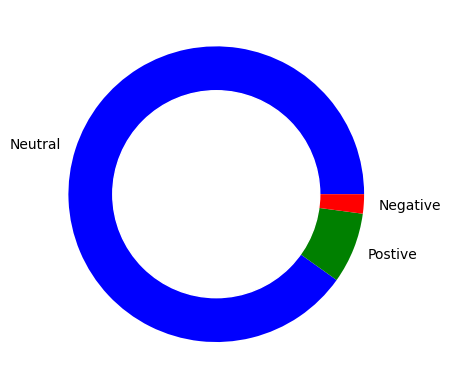

In [47]:
# create data for Pie Chart
piechart = count_values_in_column(pu_df,'sentiment_type')
names= piechart.index
size=piechart['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['blue','green','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [48]:
# Filter data for negative sentiment_type
negative_data = pu_df[pu_df['sentiment_type'] == 'Negative']

negative_data

,content,tokenized_content,sentiment,sentiment_type
40,@user you mean the purolator uniform?,"[mean, purolator, uniform]",-0.3125,Negative
72,i hate purolator… they are the worse type of delivery company,"[hate, purolator…, worse, type, delivery, company]",-0.6000,Negative
134,everytime amazon uses purolator they be fucking the delivery up,"[overtime, amazon, us, purolator, fucking, delivery]",-0.6000,Negative


In [49]:
negative_data.to_csv('Purolator Negative Tweets.csv', sep=',', index=False, encoding='utf-8')